In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
dataset = pd.read_csv("C:/Users/Amruta/OneDrive/Desktop/Titanic-Dataset.csv")
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [8]:
dataset.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

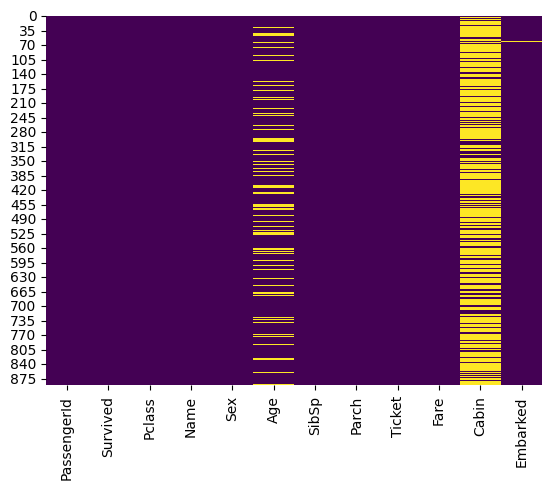

In [9]:
sns.heatmap(dataset.isnull(),cbar = False,cmap = "viridis")
plt.show()

In [15]:
# handling missing values
dataset["Age"].fillna(dataset["Age"].median())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [26]:
dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [38]:
# Remove extra spaces in column names
dataset.columns = dataset.columns.str.strip()

# Drop Cabin column
if "Cabin" in dataset.columns:
    dataset.drop("Cabin", axis=1, inplace=True)

print(dataset.columns)  # confirm Cabin is gone

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [39]:
dataset.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

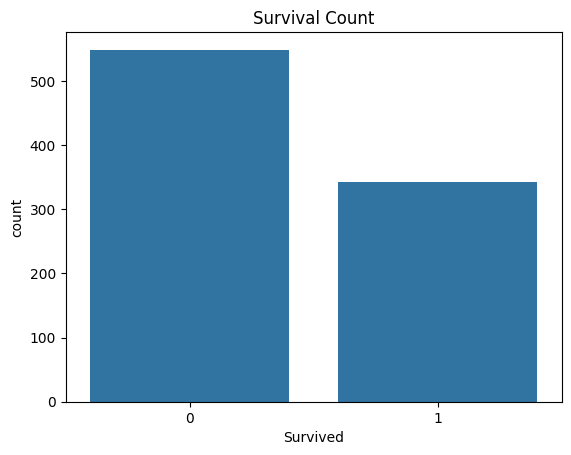

In [40]:
sns.countplot(x="Survived", data=dataset)
plt.title("Survival Count")
plt.show()


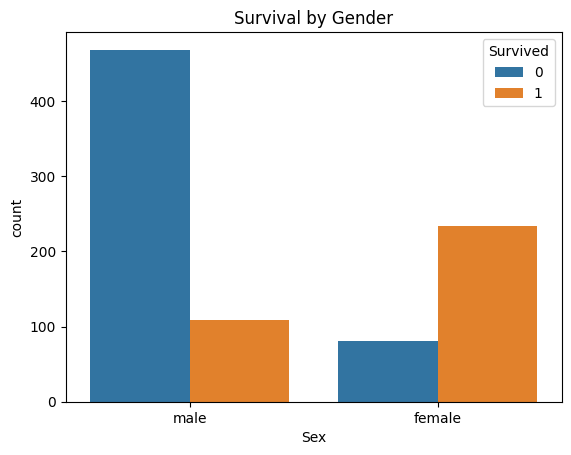

In [41]:
sns.countplot(x="Sex", hue="Survived", data=dataset)
plt.title("Survival by Gender")
plt.show()


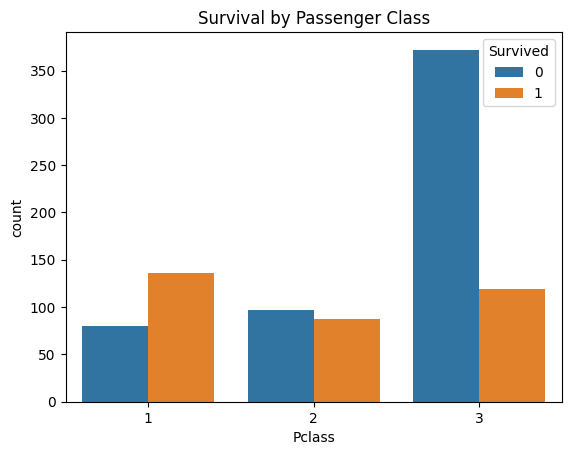

In [42]:
sns.countplot(x="Pclass", hue="Survived", data=dataset)
plt.title("Survival by Passenger Class")
plt.show()


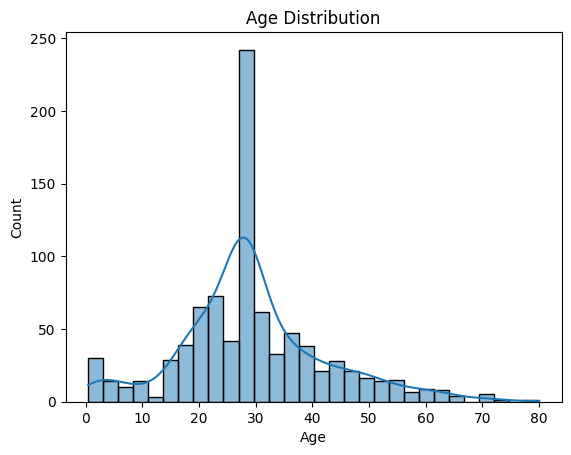

In [43]:
sns.histplot(dataset["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


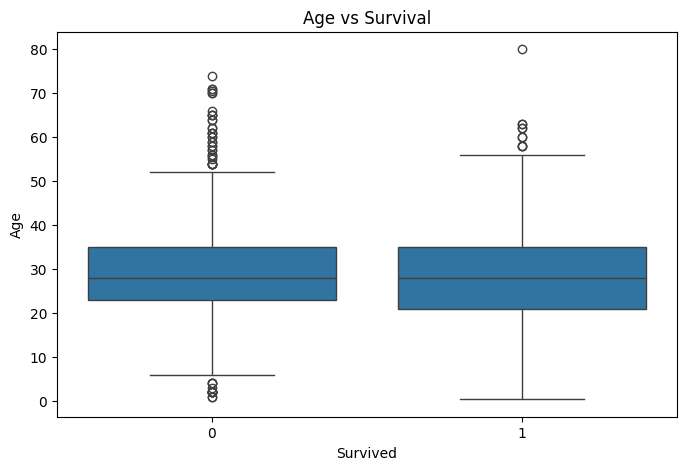

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Age", data=dataset)
plt.title("Age vs Survival")
plt.show()


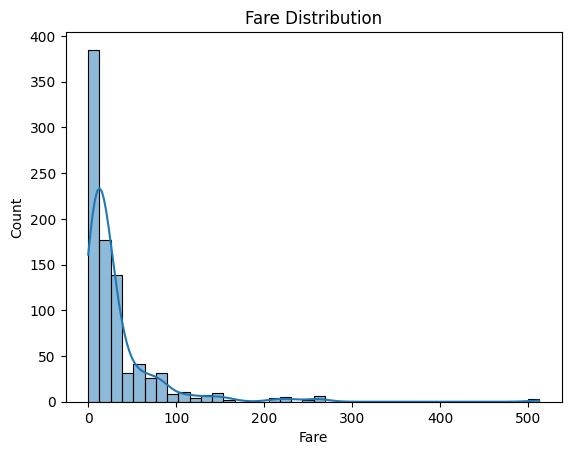

In [45]:
sns.histplot(dataset["Fare"], kde=True, bins=40)
plt.title("Fare Distribution")
plt.show()


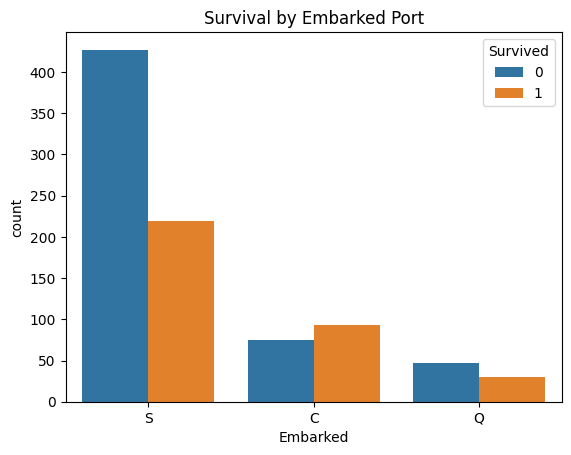

In [46]:
sns.countplot(x="Embarked", hue="Survived", data=dataset)
plt.title("Survival by Embarked Port")
plt.show()


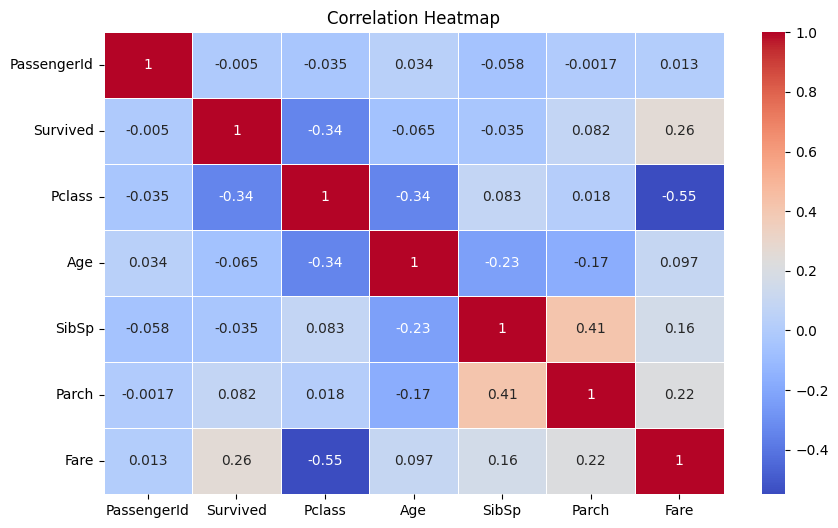

In [50]:
#correction analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_dataset = dataset.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()